<a href="https://colab.research.google.com/github/Jinny722/it-cert-automation-practice/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import packages and dataset

In [ ]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", color_codes=True)

# Import dataset
twitter = pd.read_csv("./twitter.csv")
twitter.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# 2. Data Preprocessing & Exploratory Data Analysis (EDA)

In [ ]:
# Add column to the dataset
twitter.columns = ["id", "entity", "sentiment", "content"]
twitter.head()

,id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Shape of the dataset
twitter.shape

(75681, 4)

In [ ]:
# Data cleaning by changing to lowercases, remove special characters and spaces in "content"
import re

# Function to clean the text
def clean_text(text):
    if isinstance(text, str):
        # Lowercase the text
        text = text.lower()
        # Remove special characters, numbers, and punctuations (except for basic ones)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        # Return empty string for non-string values
        text = ''
    return text

# Applying the cleaning function to the 'content' column
twitter["cleaned_content"] = twitter["content"].apply(clean_text)

# Displaying the first few rows of the cleaned content
twitter[["content", "cleaned_content"]].head()

,content,cleaned_content
0,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...
4,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [ ]:
# Counting the number of rows where 'content' is empty or null
empty_or_null_count = twitter["content"].isnull().sum() + (twitter["content"] == '').sum()

empty_or_null_count

686

In [ ]:
# Remove rows where 'content' is null or empty
twitter = twitter[twitter["content"].notnull()]  # Remove null values
twitter = twitter[twitter["content"] != '']  # Remove empty strings

# Display the number of remaining rows after removing empty or null content
remaining_rows = twitter.shape[0]
remaining_rows

74995

In [ ]:
# Calculating tweet length based on word count
twitter["tweet_length"] = twitter["cleaned_content"].apply(lambda x: len(x.split()))

# Grouping by sentiment and calculating the average tweet length
sentiment_length_analysis = twitter.groupby("sentiment")["tweet_length"].mean()

# Displaying the results
sentiment_length_analysis

,tweet_length
sentiment,
Irrelevant,18.434966
Negative,19.087429
Neutral,18.406242
Positive,16.235106


In [ ]:
# Apply tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Applying tokenization to the 'cleaned_content' column
twitter["tokens"] = twitter["cleaned_content"].apply(word_tokenize)

# Displaying the first few rows to show the tokenized content
twitter[["cleaned_content", "tokens"]].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,cleaned_content,tokens
0,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
1,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
2,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
3,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
4,im getting into borderlands and i can murder y...,"[im, getting, into, borderlands, and, i, can, ..."


In [ ]:
# Apply stopwords removal and lemmatization
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initializing stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to remove stopwords and apply lemmatization
def preprocess_text(tokens):
    # Remove stopwords and apply lemmatization
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

# Applying the preprocessing function to the 'tokens' column
twitter['processed_tokens'] = twitter['tokens'].apply(preprocess_text)

# Displaying the first few rows with processed tokens
twitter[['tokens', 'processed_tokens']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokens,processed_tokens
0,"[i, am, coming, to, the, borders, and, i, will...","[coming, border, kill]"
1,"[im, getting, on, borderlands, and, i, will, k...","[im, getting, borderland, kill]"
2,"[im, coming, on, borderlands, and, i, will, mu...","[im, coming, borderland, murder]"
3,"[im, getting, on, borderlands, and, i, will, m...","[im, getting, borderland, murder]"
4,"[im, getting, into, borderlands, and, i, can, ...","[im, getting, borderland, murder]"


EDA

In [ ]:
# Calculating tweet length based on word count
twitter["tweet_length"] = twitter["cleaned_content"].apply(lambda x: len(x.split()))

# Grouping by sentiment and calculating the average tweet length
sentiment_length_analysis = twitter.groupby("sentiment")["tweet_length"].mean()

# Displaying the results
sentiment_length_analysis

,tweet_length
sentiment,
Irrelevant,18.434966
Negative,19.087429
Neutral,18.406242
Positive,16.235106


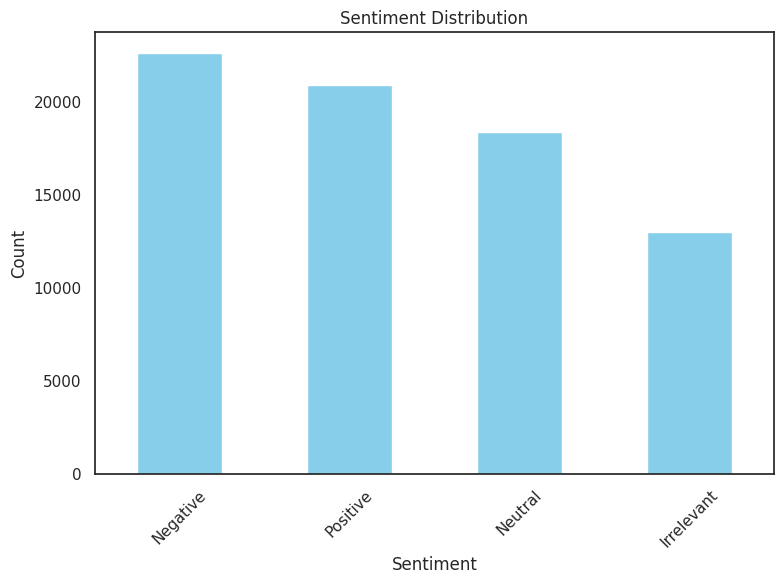

In [ ]:
# Generating a sentiment distribution analysis
sentiment_distribution = twitter["sentiment"].value_counts()

# Visualizing the sentiment distribution
plt.figure(figsize=(8,6))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

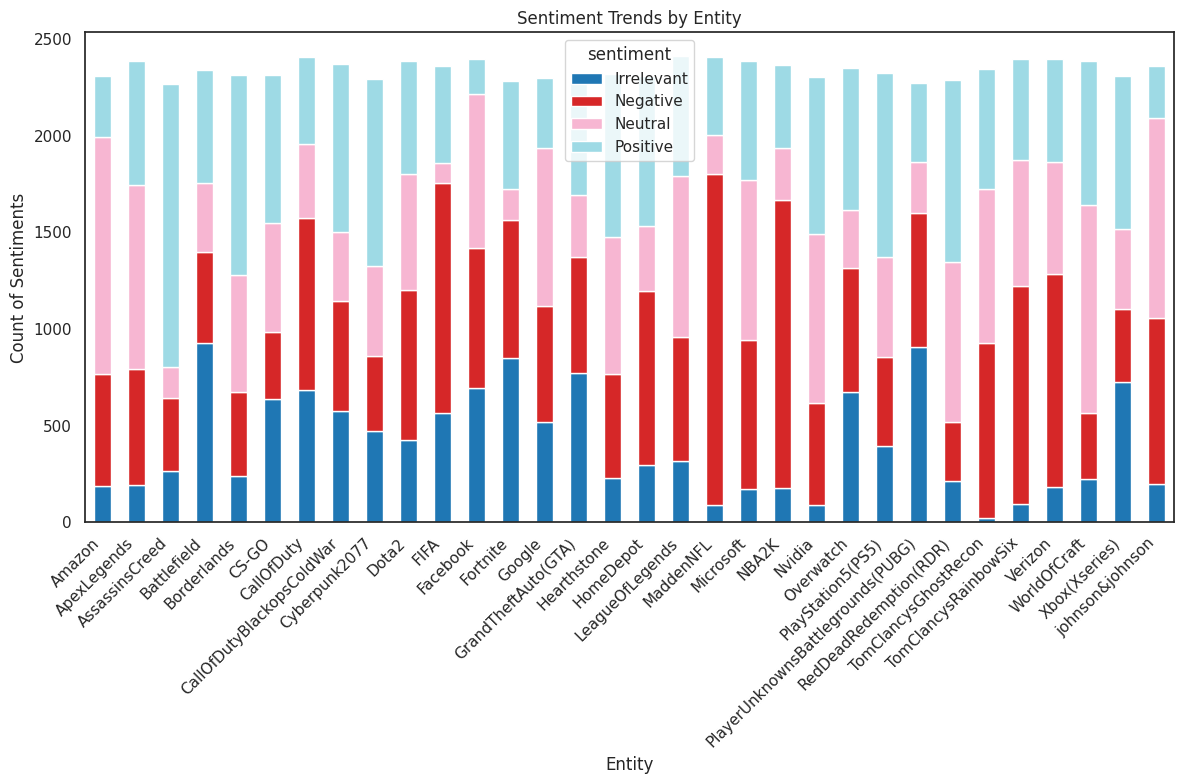

In [ ]:
# Grouping the data by 'entity' and 'sentiment' to see the distribution of sentiment by entity
sentiment_by_entity = twitter.groupby(['entity', 'sentiment']).size().unstack(fill_value=0)

# Plotting sentiment trends by entity
plt.figure(figsize=(12, 8))
sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Sentiment Trends by Entity')
plt.xlabel('Entity')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

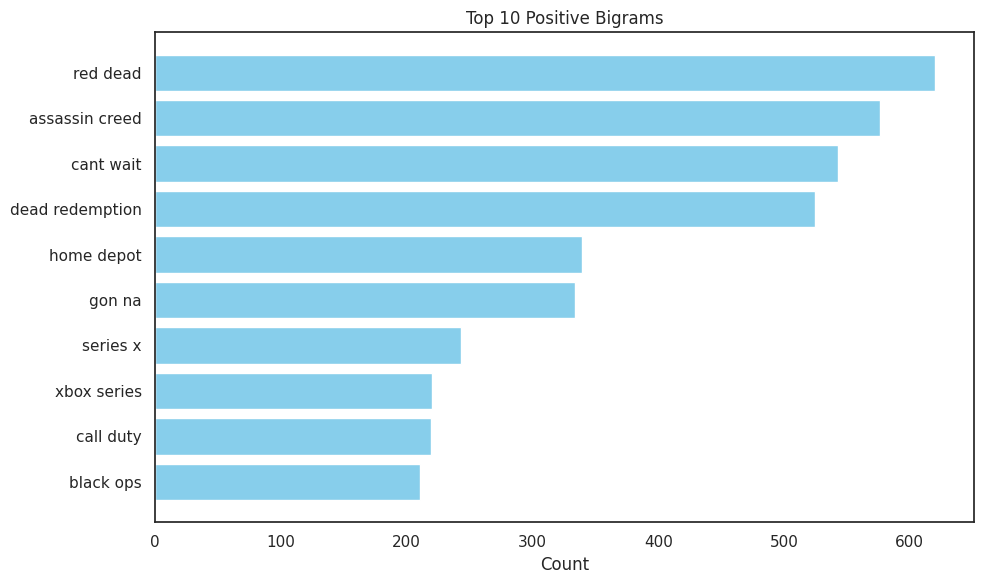

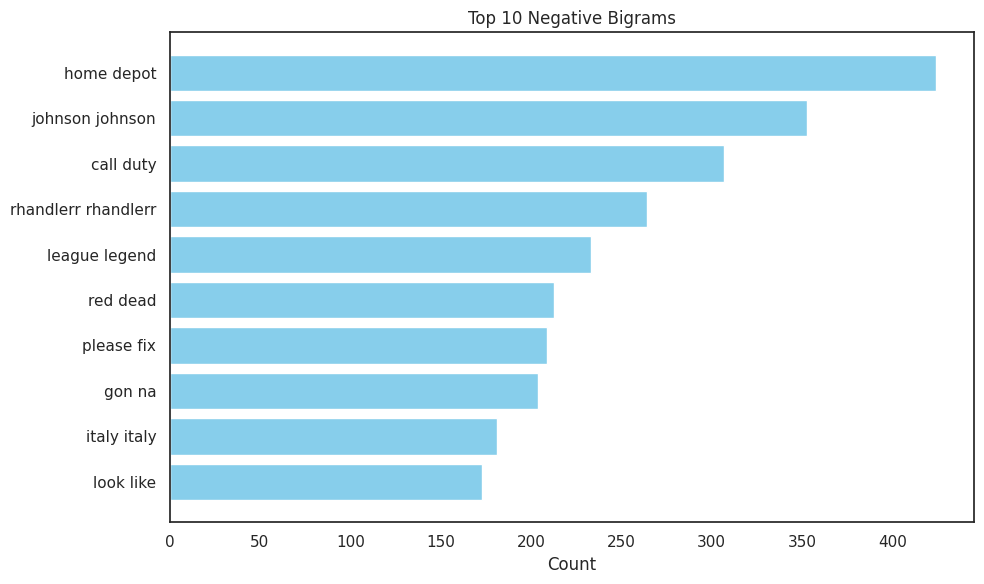

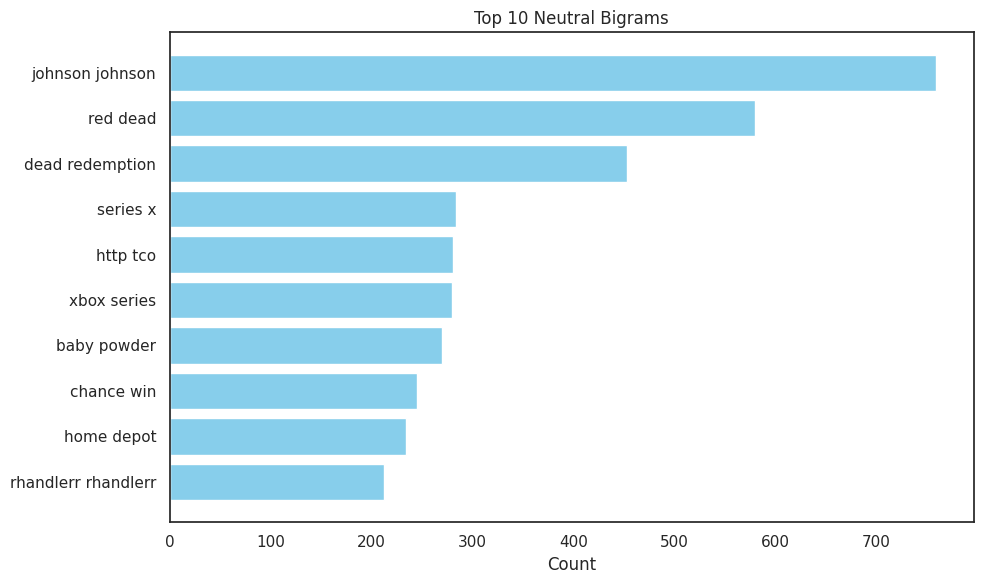

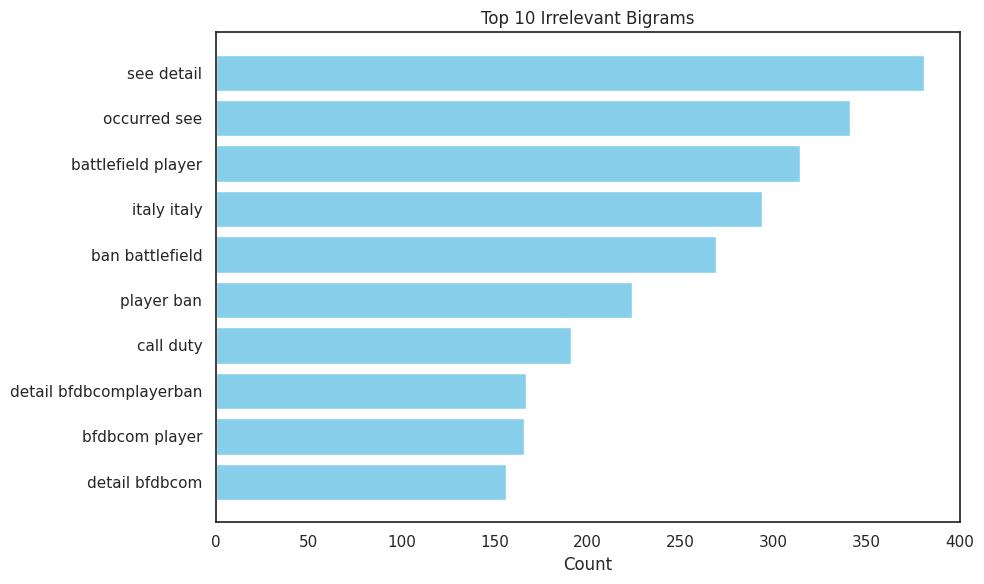

In [ ]:
from nltk import bigrams
from collections import Counter

# Function to get bigrams from tokens
def get_bigrams(tokens):
    return list(bigrams(tokens))

# Applying bigram generation to the 'processed_tokens' column
twitter['bigrams'] = twitter['processed_tokens'].apply(get_bigrams)

# Define the function to get the most common bigrams for each sentiment
def most_common_bigrams(sentiment, num_bigrams=10):
    sentiment_data = twitter[twitter['sentiment'] == sentiment]
    all_bigrams = [bigram for sublist in sentiment_data['bigrams'] for bigram in sublist]
    return Counter(all_bigrams).most_common(num_bigrams)

# Getting the most common bigrams for each sentiment
positive_bigrams = most_common_bigrams('Positive')
negative_bigrams = most_common_bigrams('Negative')
neutral_bigrams = most_common_bigrams('Neutral')
irrelevant_bigrams = most_common_bigrams('Irrelevant')

# Creating a visualization for the top bigrams by sentiment
def plot_bigrams(bigrams, title):
    bigram_labels, bigram_counts = zip(*bigrams)
    bigram_labels = [' '.join(bigram) for bigram in bigram_labels]

    plt.figure(figsize=(10,6))
    plt.barh(bigram_labels, bigram_counts, color='skyblue')
    plt.xlabel('Count')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plotting the top 10 bigrams for each sentiment
plot_bigrams(positive_bigrams, 'Top 10 Positive Bigrams')
plot_bigrams(negative_bigrams, 'Top 10 Negative Bigrams')
plot_bigrams(neutral_bigrams, 'Top 10 Neutral Bigrams')
plot_bigrams(irrelevant_bigrams, 'Top 10 Irrelevant Bigrams')


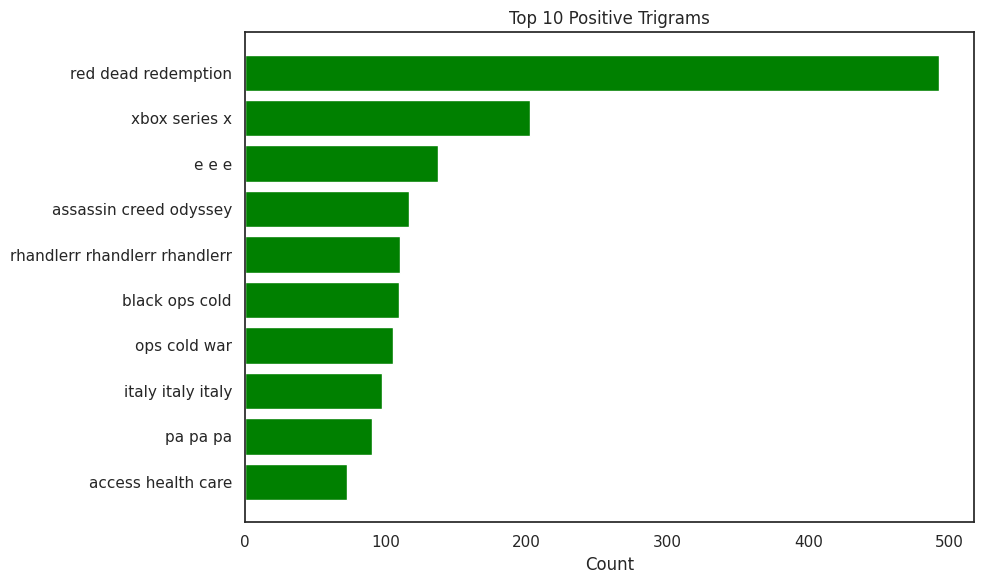

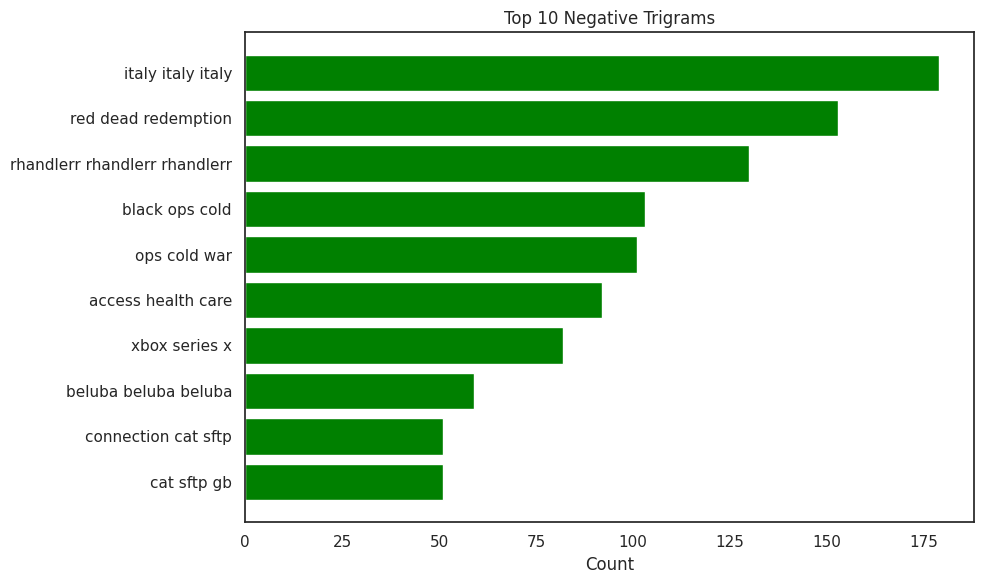

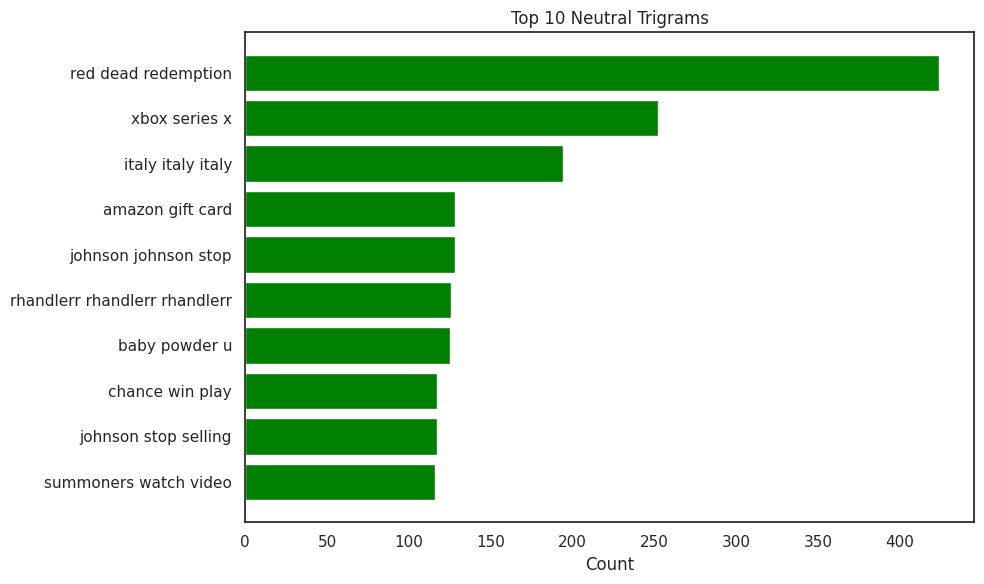

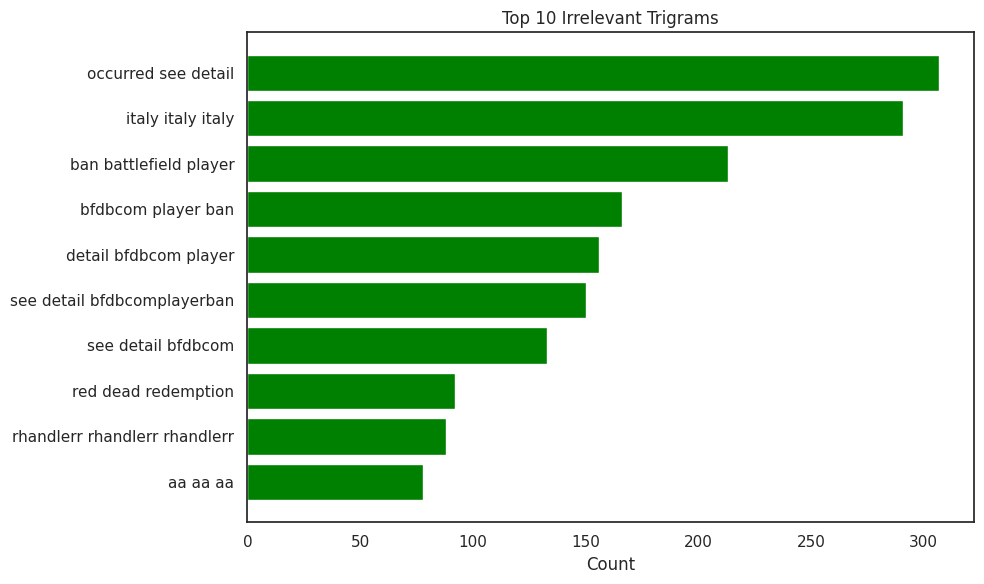

In [ ]:
# Function to generate trigrams
def get_trigrams(tokens):
    return list(nltk.trigrams(tokens))

# Generating trigrams
twitter['trigrams'] = twitter['processed_tokens'].apply(get_trigrams)

# Function to get most common trigrams for each sentiment
def most_common_trigrams(sentiment, num_trigrams=10):
    sentiment_data = twitter[twitter['sentiment'] == sentiment]
    all_trigrams = [trigram for sublist in sentiment_data['trigrams'] for trigram in sublist]
    return Counter(all_trigrams).most_common(num_trigrams)

# Getting the most common trigrams for each sentiment
positive_trigrams = most_common_trigrams('Positive')
negative_trigrams = most_common_trigrams('Negative')
neutral_trigrams = most_common_trigrams('Neutral')
irrelevant_trigrams = most_common_trigrams('Irrelevant')

# Creating a visualization for the top trigrams by sentiment
def plot_trigrams(trigram, title):
    trigram_labels, trigram_counts = zip(*trigram)
    trigram_labels = [' '.join(trigram) for trigram in trigram_labels]

    plt.figure(figsize=(10,6))
    plt.barh(trigram_labels, trigram_counts, color='green')
    plt.xlabel('Count')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Run the trigram visualization
plot_trigrams(positive_trigrams, 'Top 10 Positive Trigrams')
plot_trigrams(negative_trigrams, 'Top 10 Negative Trigrams')
plot_trigrams(neutral_trigrams, 'Top 10 Neutral Trigrams')
plot_trigrams(irrelevant_trigrams, 'Top 10 Irrelevant Trigrams')

top ten verbs/nouns (verb nouns are extracted but eda not done yet)

In [ ]:
# Downloading NLTK's POS tagger resources
nltk.download('averaged_perceptron_tagger')

# Function to perform POS tagging
def pos_tagging(tokens):
    return nltk.pos_tag(tokens)

# Applying POS tagging to the 'processed_tokens' column
twitter['pos_tags'] = twitter['processed_tokens'].apply(pos_tagging)

# Displaying the first few rows of POS-tagged data
twitter[['processed_tokens', 'pos_tags']].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,processed_tokens,pos_tags
0,"[coming, border, kill]","[(coming, VBG), (border, NN), (kill, NN)]"
1,"[im, getting, borderland, kill]","[(im, NN), (getting, VBG), (borderland, NN), (..."
2,"[im, coming, borderland, murder]","[(im, NN), (coming, VBG), (borderland, NN), (m..."
3,"[im, getting, borderland, murder]","[(im, NN), (getting, VBG), (borderland, NN), (..."
4,"[im, getting, borderland, murder]","[(im, NN), (getting, VBG), (borderland, NN), (..."


# 3. Data Preparation for Model Training

In [ ]:
# Tokenize and pad content to become numerical representation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for tokenization and padding
MAX_VOCAB_SIZE = 10000  # Limit vocabulary size to 10,000 unique words
MAX_SEQUENCE_LENGTH = 100  # Maximum length for padding

# Initializing the tokenizer
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<OOV>')  # <OOV> for out-of-vocabulary words

# Fitting the tokenizer on the cleaned text content
tokenizer.fit_on_texts(twitter['cleaned_content'])

# Converting text to sequences of integers
sequences = tokenizer.texts_to_sequences(twitter['cleaned_content'])

# Padding sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Displaying the first few padded sequences
padded_sequences[:5]

# Convert padded sequences to a list
padded_sequences_list = padded_sequences.tolist()

# Insert the padded sequences into the data frame
twitter['padded_sequences'] = padded_sequences_list

# Display the DataFrame with the new padded_sequences column
twitter.head()

,id,entity,sentiment,content,cleaned_content,tweet_length,tokens,processed_tokens,bigrams,trigrams,pos_tags,padded_sequences
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,12,"[i, am, coming, to, the, borders, and, i, will...","[coming, border, kill]","[(coming, border), (border, kill)]","[(coming, border, kill)]","[(coming, VBG), (border, NN), (kill, NN)]","[3, 101, 381, 4, 2, 6410, 5, 3, 50, 406, 13, 2..."
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,10,"[im, getting, on, borderlands, and, i, will, k...","[im, getting, borderland, kill]","[(im, getting), (getting, borderland), (border...","[(im, getting, borderland), (getting, borderla...","[(im, NN), (getting, VBG), (borderland, NN), (...","[31, 156, 14, 124, 5, 3, 50, 406, 13, 27, 0, 0..."
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,10,"[im, coming, on, borderlands, and, i, will, mu...","[im, coming, borderland, murder]","[(im, coming), (coming, borderland), (borderla...","[(im, coming, borderland), (coming, borderland...","[(im, NN), (coming, VBG), (borderland, NN), (m...","[31, 381, 14, 124, 5, 3, 50, 1694, 13, 27, 0, ..."
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...,11,"[im, getting, on, borderlands, and, i, will, m...","[im, getting, borderland, murder]","[(im, getting), (getting, borderland), (border...","[(im, getting, borderland), (getting, borderla...","[(im, NN), (getting, VBG), (borderland, NN), (...","[31, 156, 14, 124, 5, 3, 50, 1694, 13, 20, 27,..."
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,10,"[im, getting, into, borderlands, and, i, can, ...","[im, getting, borderland, murder]","[(im, getting), (getting, borderland), (border...","[(im, getting, borderland), (getting, borderla...","[(im, NN), (getting, VBG), (borderland, NN), (...","[31, 156, 176, 124, 5, 3, 47, 1694, 13, 27, 0,..."


In [ ]:
# Handle class imbalance by using undersampling
from sklearn.utils import resample

# Step 1: Identify the minority class size
minority_class_size = twitter['sentiment'].value_counts().min()

# Step 2: Separate classes
df_positive = twitter[twitter['sentiment'] == 'Positive']
df_negative = twitter[twitter['sentiment'] == 'Negative']
df_neutral = twitter[twitter['sentiment'] == 'Neutral']
df_irrelevant = twitter[twitter['sentiment'] == 'Irrelevant']

# Step 3: Undersample majority classes
df_positive_under = resample(df_positive, replace=False, n_samples=minority_class_size, random_state=42)
df_negative_under = resample(df_negative, replace=False, n_samples=minority_class_size, random_state=42)
df_neutral_under = resample(df_neutral, replace=False, n_samples=minority_class_size, random_state=42)
df_irrelevant_under = resample(df_irrelevant, replace=False, n_samples=minority_class_size, random_state=42)

# Step 4: Combine the undersampled data
df_undersampled = pd.concat([df_positive_under, df_negative_under, df_neutral_under, df_irrelevant_under])

# Step 5: Shuffle the data
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balance in the undersampled dataset
print(df_undersampled['sentiment'].value_counts())

sentiment
Negative      13047
Irrelevant    13047
Neutral       13047
Positive      13047
Name: count, dtype: int64


In [ ]:
# Checking undersampled data
df_undersampled.head()

,id,entity,sentiment,content,cleaned_content,tweet_length,tokens,processed_tokens,bigrams,trigrams,pos_tags,padded_sequences
0,7967,MaddenNFL,Negative,I,i,1,[i],[],[],[],[],"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,3727,Cyberpunk2077,Irrelevant,Due to an upgrade from my GTX 1060 Windforce a...,due to an upgrade from my gtx windforce and th...,21,"[due, to, an, upgrade, from, my, gtx, windforc...","[due, upgrade, gtx, windforce, would, great, n...","[(due, upgrade), (upgrade, gtx), (gtx, windfor...","[(due, upgrade, gtx), (upgrade, gtx, windforce...","[(due, JJ), (upgrade, JJ), (gtx, NN), (windfor...","[430, 4, 51, 1269, 34, 15, 1567, 9660, 5, 16, ..."
2,38,Amazon,Negative,I simply refuse usually to buy books off of am...,i simply refuse usually to buy books off of am...,16,"[i, simply, refuse, usually, to, buy, books, o...","[simply, refuse, usually, buy, book, amazon, m...","[(simply, refuse), (refuse, usually), (usually...","[(simply, refuse, usually), (refuse, usually, ...","[(simply, RB), (refuse, VB), (usually, RB), (b...","[3, 946, 2161, 1167, 4, 219, 2858, 155, 7, 90,..."
3,144,Amazon,Neutral,13 Long Blue Gun Battle: Charlie Serpens (AK-9...,long blue gun battle charlie serpens ak attack...,12,"[long, blue, gun, battle, charlie, serpens, ak...","[long, blue, gun, battle, charlie, serpens, ak...","[(long, blue), (blue, gun), (gun, battle), (ba...","[(long, blue, gun), (blue, gun, battle), (gun,...","[(long, RB), (blue, JJ), (gun, NN), (battle, N...","[294, 996, 1214, 698, 8954, 1, 3066, 2507, 2, ..."
4,3833,Cyberpunk2077,Negative,Booo,booo,1,[booo],[booo],[],[],"[(booo, NN)]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Preparing the training dataset
df_training = df_undersampled[['entity', 'padded_sequences', 'sentiment']].copy()

# Encoding the sentiment labels into numeric format
df_training['entity_encoded'] = label_encoder.fit_transform(df_undersampled['entity'])
df_training['sentiment_encoded'] = label_encoder.fit_transform(df_undersampled['sentiment'])

df_training

,entity,padded_sequences,sentiment,entity_encoded,sentiment_encoded
0,MaddenNFL,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Negative,18,1
1,Cyberpunk2077,"[430, 4, 51, 1269, 34, 15, 1567, 9660, 5, 16, ...",Irrelevant,8,0
2,Amazon,"[3, 946, 2161, 1167, 4, 219, 2858, 155, 7, 90,...",Negative,0,1
3,Amazon,"[294, 996, 1214, 698, 8954, 1, 3066, 2507, 2, ...",Neutral,0,2
4,Cyberpunk2077,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Negative,8,1
...,...,...,...,...,...
52183,HomeDepot,"[42, 119, 192, 5, 6490, 47, 392, 174, 427, 10,...",Positive,16,3
52184,Cyberpunk2077,"[5274, 662, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",Irrelevant,8,0
52185,TomClancysGhostRecon,"[300, 520, 121, 984, 10, 1, 5, 162, 1, 95, 4, ...",Neutral,26,2
52186,Nvidia,"[11, 134, 217, 8, 554, 2267, 69, 147, 4, 803, ...",Positive,21,3


normalization

In [ ]:
# Min-Max Scaling for entity_encoded (Normalization)
from sklearn.preprocessing import MinMaxScaler

# Initializing the min-max scaler
scaler = MinMaxScaler()

# Scaling the 'entity_encoded' column
df_training['entity_scaled'] = scaler.fit_transform(df_training[['entity_encoded']])

# Checking the scaled data
df_training[['entity_encoded', 'entity_scaled']].head()

,entity_encoded,entity_scaled
0,18,0.580645
1,8,0.258065
2,0,0.000000
3,0,0.000000
4,8,0.258065


In [ ]:
# Setting IV and TV
import numpy as np

# Independent Variables (IV)
# Combine padded_sequences and scaled entity as IV
X = np.hstack([np.array(df_training['padded_sequences'].tolist()), df_training[['entity_scaled']].values])

# Target Variable (TV)
y = df_training['sentiment_encoded']

# Check shapes to ensure everything is correctly aligned
print(f"Shape of IV (X): {X.shape}")
print(f"Shape of TV (y): {y.shape}")

Shape of IV (X): (52188, 101)
Shape of TV (y): (52188,)


In [ ]:
# Spliting dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_validation: {X_validation.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_validation: {y_validation.shape}")

Shape of X_train: (41750, 101)
Shape of X_validation: (10438, 101)
Shape of y_train: (41750,)
Shape of y_validation: (10438,)


# 4. Model Building (LSTM)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

vocab_size = 12000
embedding_dim = 64
sequence_length = 101
num_classes = len(np.unique(y_train))

# Model architecture
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
    Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.5)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
lstm_model.summary()

# Training the model
history = lstm_model.fit(X_train, y_train, epochs=5, validation_data=(X_validation, y_validation), batch_size=64)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
653/653 ━━━━━━━━━━━━━━━━━━━━ 271s 401ms/step - accuracy: 0.3344 - loss: 1.3219 - val_accuracy: 0.6147 - val_loss: 0.9534
Epoch 2/5
653/653 ━━━━━━━━━━━━━━━━━━━━ 258s 394ms/step - accuracy: 0.6516 - loss: 0.9060 - val_accuracy: 0.6919 - val_loss: 0.7970
Epoch 3/5
653/653 ━━━━━━━━━━━━━━━━━━━━ 260s 398ms/step - accuracy: 0.7386 - loss: 0.7149 - val_accuracy: 0.7194 - val_loss: 0.7353
Epoch 4/5
653/653 ━━━━━━━━━━━━━━━━━━━━ 265s 406ms/step - accuracy: 0.7748 - loss: 0.6195 - val_accuracy: 0.7445 - val_loss: 0.6842
Epoch 5/5
653/653 ━━━━━━━━━━━━━━━━━━━━ 262s 401ms/step - accuracy: 0.8017 - loss: 0.5491 - val_accuracy: 0.7523 - val_loss: 0.6680


In [ ]:
lstm_model.evaluate(X_validation, y_validation)

327/327 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.7481 - loss: 0.6695


[0.667964518070221, 0.7523471713066101]

In [ ]:
# Install keras-tuner for hyperparameter tuning
!pip install keras-tuner --upgrade

# LATER WHEN DOCUMENT SPECIFY WHY USE 10 EPOCH INSTEAD OF 5 LIKE OTHER RESEARCH PAPERS, BECAUSE MORE EPOCH CAN LEARN MORE PATTERNS, TRY WITH IT AS IT USES CV TO HELP WITH GENERALIZATION


In [ ]:
# Hyperparameter tuning using keras-tuner
from kerastuner.tuners import GridSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Parameters
vocab_size = 12000
sequence_length = 101
num_classes = len(np.unique(y_train))

def build_model(hp, vocab_size, sequence_length, num_classes):
    model = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
                  input_length=sequence_length),
        Bidirectional(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
                                return_sequences=True,
                                dropout=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1))),
        Bidirectional(LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=64, step=16),
                                dropout=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1))),
        Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'),
        Dropout(rate=hp.Float('dropout_3', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform the hyperparameter tuning
tuner = GridSearch(
    build_model,
    objective='val_accuracy',
    max_epochs = 10,
    directory='hyperparam_tuning',
    project_name='twitter')

# Display search space overview
tuner.search_space_summary()

In [ ]:
# Perform the hyperparameter search
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_validation, y_validation))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model
best_model.summary()

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from keras_tuner import Hyperband

vocab_size = 12000
embedding_dim = 128
sequence_length = 101
num_classes = len(np.unique(y_train))

# Model architecture
best_lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.30000000000000004)),
    Bidirectional(LSTM(64, dropout=0.5)),
    Dense(96, activation='relu'),
    Dropout(0.0),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
best_model.compile(optimizer=Adam(learning_rate=0.002739740054213502),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Summary of the model
best_model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 101, 128)          1536000   
                                                                 
 bidirectional_6 (Bidirecti  (None, 101, 256)          263168    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 96)                12384     
                                                                 
 dropout_3 (Dropout)         (None, 96)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                

In [ ]:
best_history = best_model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation), batch_size=64)

Epoch 1/50
653/653 [==============================] - 148s 218ms/step - loss: 0.9795 - accuracy: 0.5934 - val_loss: 0.7922 - val_accuracy: 0.6965
Epoch 2/50
653/653 [==============================] - 141s 216ms/step - loss: 0.5924 - accuracy: 0.7776 - val_loss: 0.6353 - val_accuracy: 0.7612
Epoch 3/50
653/653 [==============================] - 141s 216ms/step - loss: 0.4239 - accuracy: 0.8426 - val_loss: 0.5910 - val_accuracy: 0.7838
Epoch 4/50
653/653 [==============================] - 142s 217ms/step - loss: 0.3326 - accuracy: 0.8745 - val_loss: 0.5433 - val_accuracy: 0.8120
Epoch 5/50
653/653 [==============================] - 141s 216ms/step - loss: 0.2711 - accuracy: 0.8970 - val_loss: 0.5475 - val_accuracy: 0.8223
Epoch 6/50
653/653 [==============================] - 142s 217ms/step - loss: 0.2326 - accuracy: 0.9099 - val_loss: 0.5869 - val_accuracy: 0.8257
Epoch 7/50
653/653 [==============================] - 141s 216ms/step - loss: 0.2035 - accuracy: 0.9215 - val_loss: 0.5994 -

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import interp1d
from itertools import cycle

# Assuming y_pred are your predictions and y_true are the true labels
y_pred = best_model.predict(X_validation).argmax(axis=1)

# Print classification report
print(classification_report(y_validation, y_pred))

# Define classes using unique labels from y_validation (or y_train)
classes = np.unique(y_validation)

# Generate confusion matrix
conf_mat = confusion_matrix(y_validation, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
# print(conf_mat)

# Plotting training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Process class labels for multi-class ROC
y_bin = label_binarize(y_validation, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], model.predict(X_validation)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#Loss Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

#Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

#Error Analysis
# Calculate error types and their frequencies
error_types = defaultdict(int)
for true_label, pred_label in zip(y_validation, y_pred):
    if true_label != pred_label:
        error_type = f"True: {true_label}, Predicted: {pred_label}"
        error_types[error_type] += 1

#Plotting error analysis
plt.figure(figsize=(10, 6))
plt.bar(error_types.keys(), error_types.values(), color='skyblue')
plt.xlabel('Error Types')
plt.ylabel('Count')
plt.title('Distribution of Error Types in Misclassifications')
plt.xticks(rotation=45)
plt.tight_layout()

# Calculate F1-score for each class
# Setting average=None will return the F1-score for each class individually
f1_scores = f1_score(y_validation, y_pred, average=None)

# Define classes using unique labels from y_validation
classes = np.unique(y_validation)

# Plot F1-scores
plt.figure(figsize=(8, 5))
plt.plot(classes, f1_scores, marker='o', linestyle='-', color='blue')
plt.title('F1-scores for Each Class')
plt.xlabel('Classes')
plt.ylabel('F1-score')
plt.grid(True)
plt.xticks(classes)

# Display the plots
plt.show()


NameError: name 'best_model' is not defined